In [1]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf

In [2]:
seed = 20
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("dataset.csv", delimiter=",")

In [3]:
X = dataset[:,0:8]
Y = dataset[:,8]

In [4]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
# checkpoint
import os
filepath="./checkpoints/"
checkpoint_prefix = os.path.join(filepath, "cp-epoch-{epoch}.ckpt")

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

checkpoint = ModelCheckpoint(
    checkpoint_prefix,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='max'
)

log_csv = CSVLogger('my_log.csv', separator=',', append=True)

In [7]:
model = create_model()
initial_epoch = 0

In [8]:
callbacks_list = [checkpoint, log_csv]

In [9]:
ckpt_path = tf.train.latest_checkpoint('checkpoints/')

if ckpt_path is not None:
    model.load_weights(ckpt_path)
    initial_epoch = int(ckpt_path.split('-')[-1].split('.')[0])
    print(initial_epoch)
    
epochs = initial_epoch + 10
# Fit the model
hist = model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=10, callbacks=callbacks_list, verbose=1, initial_epoch=initial_epoch)

9
Epoch 10/19
52/52 [==============================] - 36s 36ms/step - loss: 0.7411 - accuracy: 0.6647 - val_loss: 0.6870 - val_accuracy: 0.6181

Epoch 00010: val_accuracy improved from -inf to 0.61811, saving model to ./checkpoints\cp-epoch-10.ckpt
Epoch 11/19
52/52 [==============================] - 1s 10ms/step - loss: 0.7001 - accuracy: 0.6775 - val_loss: 0.7027 - val_accuracy: 0.6142

Epoch 00011: val_accuracy did not improve from 0.61811
Epoch 12/19
52/52 [==============================] - 1s 14ms/step - loss: 0.6791 - accuracy: 0.6725 - val_loss: 0.6785 - val_accuracy: 0.6417

Epoch 00012: val_accuracy improved from 0.61811 to 0.64173, saving model to ./checkpoints\cp-epoch-12.ckpt
Epoch 13/19
52/52 [==============================] - 1s 11ms/step - loss: 0.6529 - accuracy: 0.6755 - val_loss: 0.9475 - val_accuracy: 0.5669

Epoch 00013: val_accuracy did not improve from 0.64173
Epoch 14/19
52/52 [==============================] - 1s 11ms/step - loss: 0.7325 - accuracy: 0.6611 - va

In [10]:
import tensorflow as tf
ckpt_path = tf.train.latest_checkpoint('checkpoints/')
print(ckpt_path)
print(ckpt_path)
print(tf.train.load_checkpoint(ckpt_path))

checkpoints/cp-epoch-16.ckpt
checkpoints/cp-epoch-16.ckpt


In [11]:

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

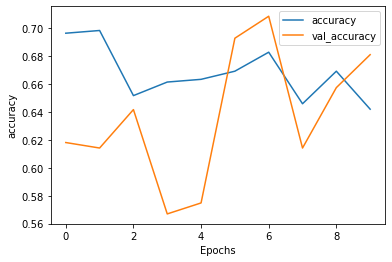

In [12]:
plot_graphs(hist, 'accuracy')

In [13]:
model.save('mymodel.h5')

In [14]:
loaded_model =  load_model('mymodel.h5')

In [17]:
loaded_model.predict(dataset[:,0:8])

array([[1.20319538e-01],
       [6.20063730e-02],
       [4.21936244e-01],
       [7.87218362e-02],
       [7.47143209e-01],
       [1.27899095e-01],
       [2.89755851e-01],
       [5.71126640e-01],
       [9.75964725e-01],
       [1.86171047e-02],
       [5.83612435e-02],
       [5.24416983e-01],
       [1.53308719e-01],
       [1.47385627e-01],
       [1.40201032e-01],
       [3.73398632e-01],
       [3.48737277e-02],
       [1.83213398e-01],
       [1.29190013e-01],
       [1.32797912e-01],
       [7.54729882e-02],
       [1.42012343e-01],
       [2.58699238e-01],
       [1.75966337e-01],
       [8.79373029e-02],
       [2.52525479e-01],
       [3.34947288e-01],
       [1.53224692e-01],
       [1.35647222e-01],
       [6.27432615e-02],
       [3.52829024e-02],
       [7.46621132e-01],
       [1.47681698e-01],
       [2.95026097e-02],
       [1.55873612e-01],
       [7.11718976e-01],
       [3.95067841e-01],
       [8.01661164e-02],
       [1.06325753e-01],
       [6.26460791e-01],
